In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [11]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [12]:
df.shape

(400, 9)

In [13]:
df.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [14]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [15]:
df['Admitted'] = np.where(df['Chance of Admit '] >= 0.9, 1, 0)

In [16]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,0
396,397,325,107,3,3.0,3.5,9.11,1,0.84,0
397,398,330,116,4,5.0,4.5,9.45,1,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0


In [26]:
x = df.drop(['Chance of Admit ', 'Admitted'], axis=1)
y = df['Admitted']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
X_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,4,322,110,3,3.5,2.5,8.67,1
18,19,318,110,3,4.0,3.0,8.80,0
202,203,340,120,5,4.5,4.5,9.91,1
250,251,320,104,3,3.0,2.5,8.57,1
274,275,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...,...
71,72,336,112,5,5.0,5.0,9.76,1
106,107,329,111,4,4.5,4.5,9.18,1
270,271,306,105,2,2.5,3.0,8.22,1
348,349,302,99,1,2.0,2.0,7.25,0


In [28]:
Y_train

,Admitted
3,0
18,0
202,1
250,0
274,0
...,...
71,1
106,0
270,0
348,0


In [29]:
X_test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,210,301,104,3,3.5,4.0,8.12,1
280,281,311,102,3,4.5,4.0,8.64,1
33,34,340,114,5,4.0,4.0,9.60,1
210,211,325,108,4,4.5,4.0,9.06,1
93,94,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...,...
246,247,316,105,3,3.0,3.5,8.73,0
227,228,312,110,2,3.5,3.0,8.53,0
369,370,301,98,1,2.0,3.0,8.03,1
176,177,329,119,4,4.5,4.5,9.16,1


In [30]:
Y_test

,Admitted
209,0
280,0
33,1
210,0
93,0
...,...
246,0
227,0
369,0
176,1


In [31]:
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [34]:
Y_pred = model.predict(X_test)

In [35]:
confusion_matrix(Y_test, Y_pred)

array([[62,  3],
       [ 3, 12]])

In [36]:
accuracy_score(Y_test, Y_pred)

0.925

In [37]:
recall_score(Y_test, Y_pred)

0.8

In [38]:
f1_score(Y_test, Y_pred)

0.8

In [39]:
from sklearn.tree import plot_tree

[Text(0.45454545454545453, 0.9444444444444444, 'CGPA <= 9.225\ngini = 0.228\nsamples = 320\nvalue = [278, 42]\nclass = 0'),
 Text(0.2727272727272727, 0.8333333333333334, 'GRE Score <= 335.0\ngini = 0.014\nsamples = 276\nvalue = [274, 2]\nclass = 0'),
 Text(0.36363636363636365, 0.8888888888888888, 'True  '),
 Text(0.18181818181818182, 0.7222222222222222, 'CGPA <= 9.15\ngini = 0.007\nsamples = 275\nvalue = [274, 1]\nclass = 0'),
 Text(0.09090909090909091, 0.6111111111111112, 'gini = 0.0\nsamples = 265\nvalue = [265, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.6111111111111112, 'CGPA <= 9.165\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.18181818181818182, 0.5, 'University Rating <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.09090909090909091, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.36363636363636365, 0.

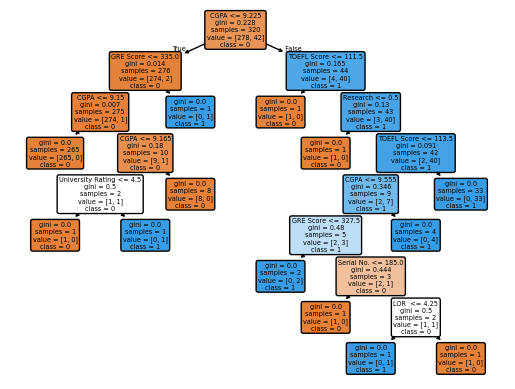

In [42]:
feature_names = X_train.columns
class_names = ['0', '1']


plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)

In [49]:
Serial_no = int(input("Enter Serial No: "))
GRE_score = int(input("Enter GRE Score: "))
TOEFL_score = int(input("Enter TOEFL Score:"))
University_Rating = int(input("Enter University Rating:"))
SOP = float(input("Enter Statement of Purpose:"))
LOR = float(input("Enter Letter of Recommendation:"))
CGPA = float(input("Enter CGPA:"))
Research = int(input("Enter Research Experience:"))
print("Chance of admit:", model.predict([[Serial_no, GRE_score, TOEFL_score, University_Rating, SOP, LOR, CGPA, Research]])[0])


Enter Serial No: 2
Enter GRE Score: 324
Enter TOEFL Score:107
Enter University Rating:4
Enter Statement of Purpose:4
Enter Letter of Recommendation:4.5
Enter CGPA:8.87
Enter Research Experience:1
Chance of admit: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
